<a href="https://colab.research.google.com/github/dimple2020/Linear-Regression/blob/main/PLSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# from sklearn.compose import TransformedTargetRegressor
# from sklearn.preprocessing import StandardScaler
from copy import deepcopy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# poly_model = LinearRegression()

In [ ]:


steps = [
    ('model', Ridge(
                alpha=1e-5,
                fit_intercept=False
                )
    )
]

# pipeline = Pipeline(steps)
# pipeline = make_pipeline(
#     PolynomialFeatures(degree=2),
#     TransformedTargetRegressor(
#     regressor=Ridge(alpha=1e-10, fit_intercept=False)
# ))

In [ ]:
numbers = [0, 3.9, 5, 6.5, 7.8]
degree = 2
all_X_train = []
all_X_test = []
all_Y_train = []
all_Y_test = []
names = ["AB", "EC", "PA"]
for nam in names:
    train = []
    test = []
    Y_train = []
    Y_test = []
    X_train = []
    X_test = []

    for num in numbers:
        name = 'Data/'+ str(nam) +  str(num) + '.xlsx'
        data = pd.read_excel(name, header=None)
        X = data.columns.to_numpy()
        X_train, X_test = train_test_split(X, random_state=11, test_size=0.3)
        Y_train.extend([num]*len(X_train))
        Y_test.extend([num]*len(X_test))

        for i in X_train:
            train.append(data[i].to_list())

        del X_train

        for i in X_test:
            test.append(data[i].to_list())
        del X_test

    X_train = np.array(train)
    X_test = np.array(test)
    Y_train = np.array(Y_train)
    Y_test = np.array(Y_test)
    X_train = np.hstack([X_train**(i+1) for i in range(degree)])
    X_test = np.hstack([X_test**(i+1) for i in range(degree)])

    all_X_train.append(deepcopy(X_train))
    all_X_test.append(deepcopy(X_test))
    all_Y_train.append(deepcopy(Y_train))
    all_Y_test.append(deepcopy(Y_test))


AB RMSE Train: 0.4665142309060808
AB RMSE Test: 1.6347043660912834


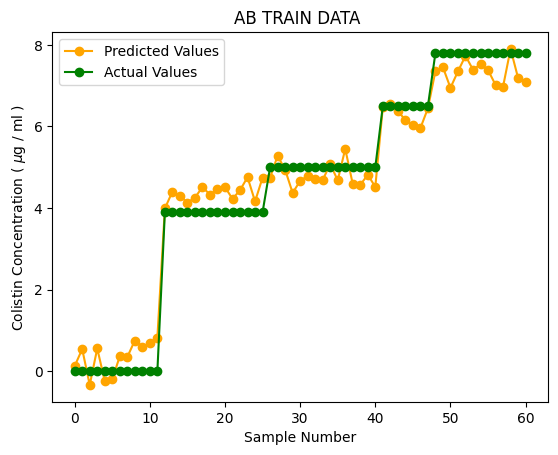

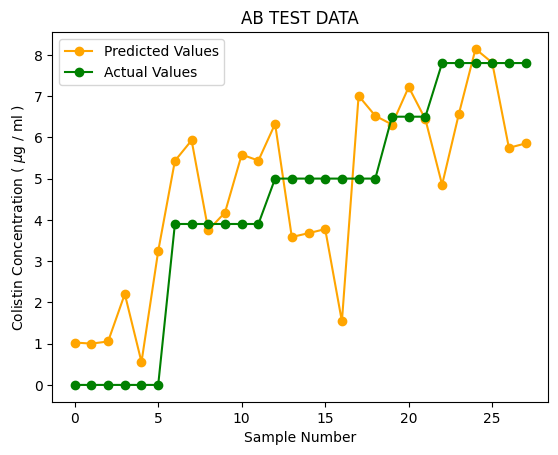

EC RMSE Train: 0.30548690964103964
EC RMSE Test: 0.9904482312680424


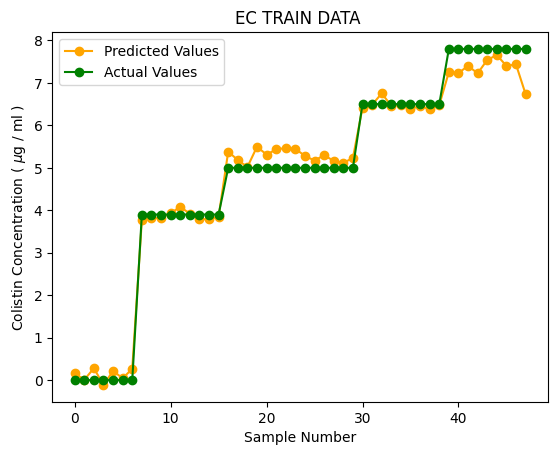

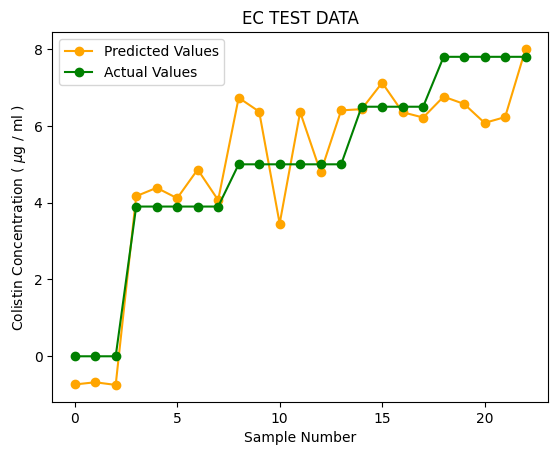

PA RMSE Train: 0.33890421357280687
PA RMSE Test: 1.0944104543458602


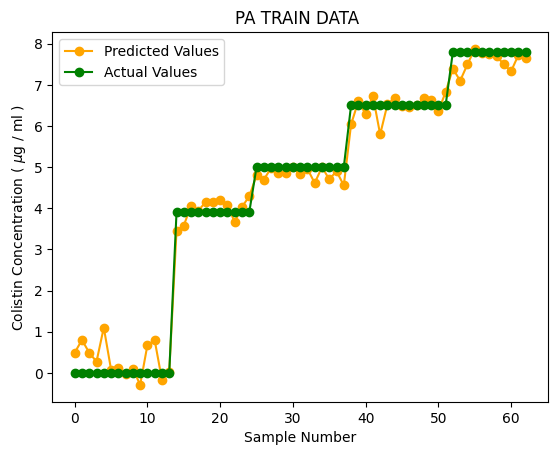

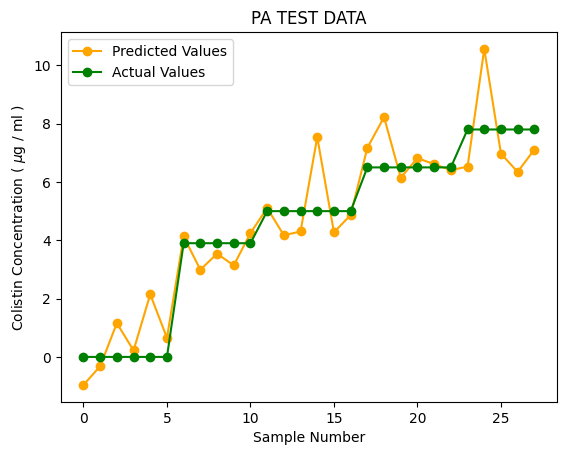

In [ ]:
all_coeffs = []
# coeffs_degree = []
for i in range(3):
    # pls2 = pipeline(n_components=10)
    pipeline = Pipeline(steps)
    pipeline.fit(all_X_train[i], all_Y_train[i])

    Y_pred_train = pipeline.predict(all_X_train[i])
    mse = mean_squared_error(all_Y_train[i], Y_pred_train)
    rmse = math.sqrt(mse)

    print(f'{names[i]} RMSE Train: {rmse}')

    Y_pred_test = pipeline.predict(all_X_test[i])
    mse = mean_squared_error(all_Y_test[i], Y_pred_test)
    rmse = math.sqrt(mse)

    coeffs_degree = []
    for j in range(degree):
        coeffs = []
        for k in range(475):
            coeffs.append(pipeline['model'].coef_[k + j*475])
        coeffs_degree.append(coeffs)

    all_coeffs.append(coeffs_degree)

    print(f'{names[i]} RMSE Test: {rmse}')
    plt.plot(Y_pred_train, label="Predicted Values", color="orange", marker="o")
    plt.plot(all_Y_train[i], label="Actual Values", color="green", marker="o")
    plt.ylabel("Colistin Concentration ( $\mu$g / ml )")
    plt.xlabel("Sample Number")
    plt.title(f"{names[i]} TRAIN DATA ")
    plt.legend(loc="upper left")
    # plt.savefig(f"{names[i]}_Train.jpeg")
    plt.show()

    plt.plot(Y_pred_test, label="Predicted Values", color="orange", marker="o")
    plt.plot(all_Y_test[i], label="Actual Values", color="green", marker="o")
    plt.ylabel("Colistin Concentration ( $\mu$g / ml )")
    # plt.ylim(0, 10)
    plt.xlabel("Sample Number")
    plt.title(f"{names[i]} TEST DATA")
    plt.legend(loc="upper left")
    # plt.savefig(f"{names[i]}_TEST.jpeg")
    plt.show()
    del pipeline


# for i in range(degree):
#     coeff = []
#     for j in range(3):
#         coeff.append(coeffs_degree[i + j*degree])
#     all_coeffs.append(coeff)

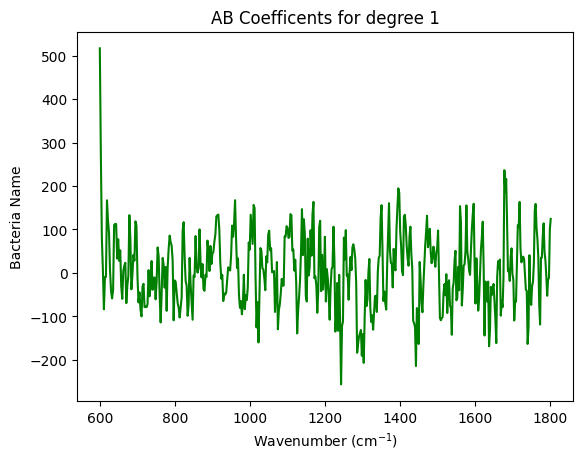

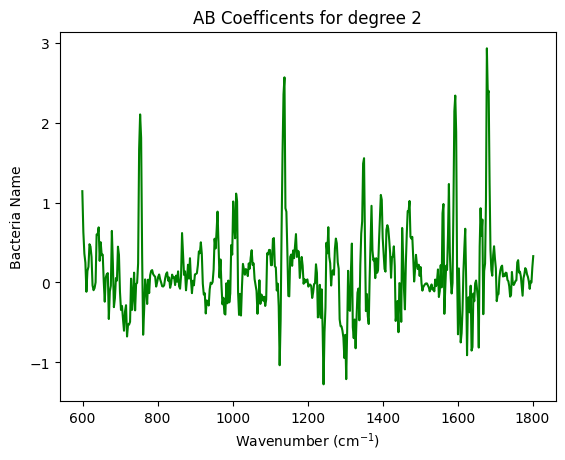

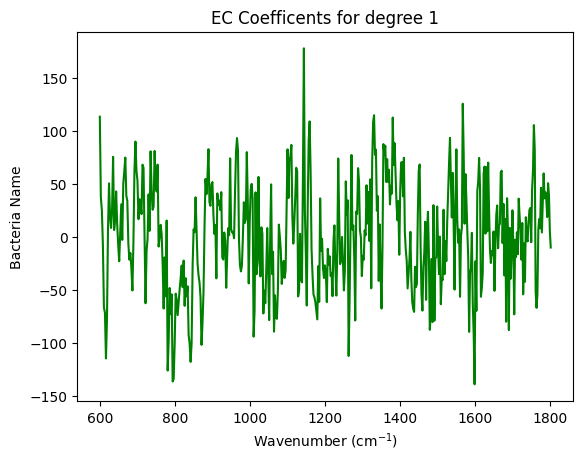

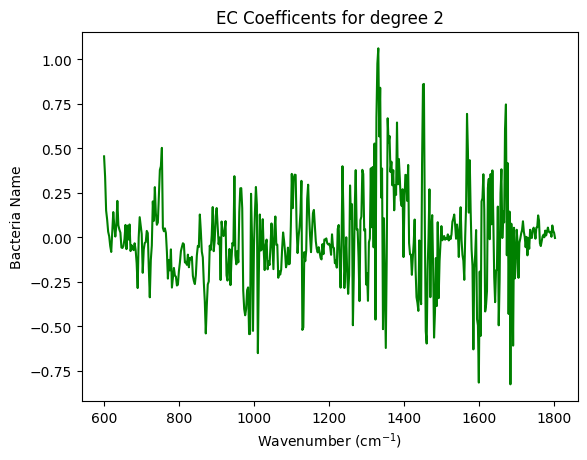

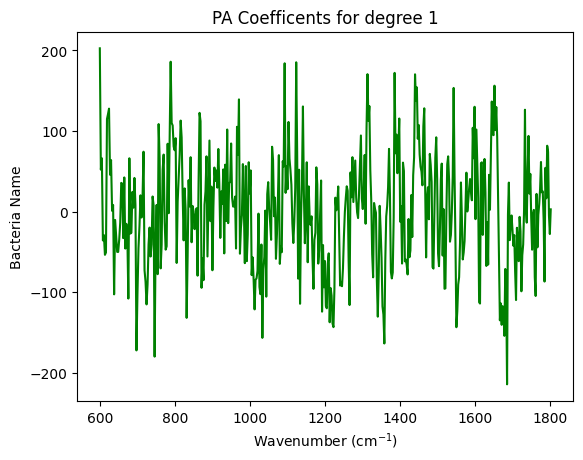

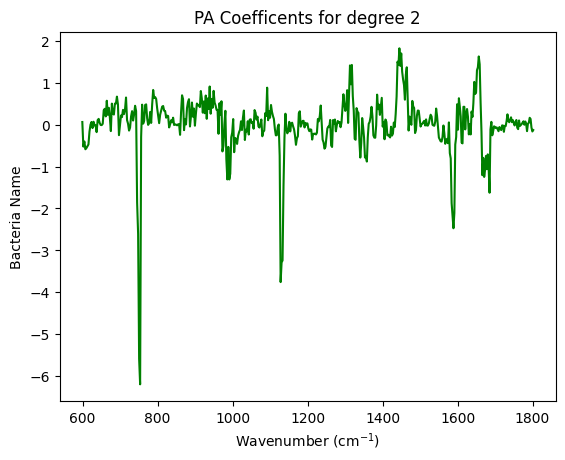

In [ ]:
data = pd.read_excel("Data/x.xlsx", header=None)
x_axis = data[0].to_numpy()
for k in range(3):
    for j in range(degree):
        # coeffs = []
        # for i in range(475):
            # coeffs.append(pls2.coef_[i + j*475])

        # coeffs = np.array(coeffs)
        # matrix =
        # , shading='gouraud'
        # for i in range(10):
            # all_coeffs[k][j]
        plot = plt.plot(x_axis, all_coeffs[k][j], 'g-')
        # im = plt.imshow(coeffs, cmap="plasma")
        # plt.yticks(np.arange(1, 4), names)
    # plt.ylim(-3, 5)
        plt.xlabel("Wavenumber (cm${}^{-1}$)")
        plt.ylabel("Bacteria Name")
        # plt.colorbar(label="Coefficients")
        plt.title(f"{names[k]} Coefficents for degree {j+1}")
        # plt.savefig(f"{names[k]} Coefficents for degree {j+1}.jpeg")
        plt.show()

In [ ]:
# train = []
# test = []
# Y_train = []
# Y_test = []
# numbers = [5]
# for num in numbers:
#     name = 'Data/AB' +  str(num) + '.xlsx'
#     data = pd.read_excel(name, header=None)
#     X = data.columns.to_numpy()
#     X_train, X_test = train_test_split(X, random_state=11, test_size=0.3)
#     Y_train.extend([num]*len(X_train))
#     Y_test.extend([num]*len(X_test))

#     for i in X_train:
#         # temp = [x ** -1 if x != 0 else 0 for x in data[i][0:76].to_list()]
#         # temp = [x ** -1 if x != 0 else 0 for x in data[i][191:270].to_list()]
#         # temp = [x ** -1 if x != 0 else 0 for x in data[i].to_list()]
#         # temp.extend(data[i].to_list())
#         train.append(data[i].to_list())
#         # train.append(temp)

#     del X_train

#     for i in X_test:
#         # temp = [x ** -1 if x != 0 else 0 for x in data[i][0:76].to_list() ]
#         # temp = [x ** -1 if x != 0 else 0 for x in data[i][191:270].to_list()]
#         # temp = [x ** -1 if x != 0 else 0 for x in data[i].to_list()]
#         # temp.extend(data[i].to_list())
#         test.append(data[i].to_list())
#         # test.append(temp)
#     del X_test

# X_train = np.array(train)
# X_test = np.array(test)
# Y_train = np.array(Y_train)
# Y_test = np.array(Y_test)



In [ ]:
# Y_pred_train = pipeline.predict(X_train)
# mse = mean_squared_error(Y_train, Y_pred_train)
# rmse = math.sqrt(mse)

# print('RMSE: Train {}'.format(rmse))

# Y_pred_test = pipeline.predict(X_test)
# mse = mean_squared_error(Y_test, Y_pred_test)
# rmse = math.sqrt(mse)

# print('RMSE: Test {}'.format(rmse))

In [ ]:
# print(pipeline['model'].coef_)
# print(pipeline['model'].intercept_)
# print(Y_pred_test)


In [ ]:
# # print(pipeline['poly'].powers_.shape)
# # print(pipeline['poly'].powers_[1])
# data = pd.read_excel("Data/x.xlsx", header=None)
# x_axis = data[0].to_numpy()
# for j in range(degree):
#     coeffs = []
#     for i in range(475):
#         coeffs.append(pipeline['model'].coef_[i + j*475])
#     plt.plot(x_axis, coeffs, color="green", label="Lambda " + str(j+1))
#     plt.xlabel("Wavelength")
#     plt.ylabel("Coefficient value")
#     plt.title("Coefficients")
#     plt.legend(loc="upper right")
#     plt.show()

In [ ]:
# # length = len(Y_pred_train)
# # value = 3 / (length - 1)
# # ticks = [0 + value for _ in range(length)]
# # plt.yticks(Y_pred_train, ticks)
# # plt.yticks(Y_train, ticks)
# plt.plot(Y_pred_train, label="Predicted Values", color="orange", marker="o")
# plt.plot(Y_train, label="Actual Values", color="green", marker="o")
# # plt.ylim(num - 0.5, num + 0.5)
# plt.ylabel("Colistin Concentration ( $\mu$g / ml )")
# plt.xlabel("Sample Number")
# # plt.title("PA-" +str(num)+ " TRAIN DATA")
# # plt.title("PA-" +"CONTROL"+ " TRAIN DATA")
# plt.title("AB TRAIN DATA")
# plt.legend()
# # plt.savefig("AB_TRAIN.jpeg")
# plt.show()

In [ ]:
# # length = len(Y_pred_train)
# # value = 3 / (length - 1)
# # ticks = [0 + value for _ in range(length)]
# # plt.yticks(Y_pred_train, ticks)
# # plt.yticks(Y_train, ticks)
# plt.plot(Y_pred_test, label="Predicted Values", color="orange", marker="o")
# plt.plot(Y_test, label="Actual Values", color="green", marker="o")
# # plt.ylim(num - 0.5, num + 0.5)
# plt.ylabel("Colistin Concentration ( $\mu$g / ml )")
# plt.xlabel("Sample Number")
# # plt.title("PA-" +str(num)+ " TEST DATA")
# # plt.title("PA-" +"CONTROL"+ " TEST DATA")
# plt.title("AB TEST DATA")
# plt.legend()
# # plt.savefig("AB_TEST.jpeg")
# plt.show()